In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
nrows = 2000000
df = pd.read_csv('df_cleaned.csv',nrows=nrows)

# RQ8

In [3]:
#RQ8.1
from scipy import stats
from statsmodels.stats import weightstats as stests
rus=df[df['language']==('russian')].groupby("review_id").weighted_vote_score
chi=df[df['language']==('schinese')].groupby("review_id").weighted_vote_score
rus_mean = rus.sum().mean()
chi_mean = chi.sum().mean()
print("Mean:",rus_mean,chi_mean)
rus_std = rus.sum().std()
chi_std = chi.sum().std()
print("Std:",rus_std,chi_std)
rus_df=df[df['language']==('russian')].weighted_vote_score
chi_df=df[df['language']==('schinese')].weighted_vote_score

Mean: 0.18525306443273157 0.13383558047085925
Std: 0.2501283405782539 0.23345577009747834


In [4]:
#Null hypothesis: Chinese review weighted vote score bigger than russian review
#Alternative hypothesis: Russian review weighted vote score bigger than chinese review
ztest, pval = stests.ztest(rus_df,chi_df,value=(chi_mean-rus_mean), alternative='two-sided')
print("p-value",pval)
if pval <0.05:
    print("we reject null hypothesis")
else: 
    print("we accept null hypothesis")

p-value 0.0
we reject null hypothesis


## We prove with z test that russian review weighted vote score bigger than chinese review

In [5]:
#RQ8.2
df_diff = (pd.to_datetime(df["timestamp_updated"])-pd.to_datetime(df["timestamp_created"]))
df_diff = pd.Series(df_diff,name="time_diff")
df_diff.to_frame()

,time_diff
0,0 days 00:00:00
1,0 days 00:00:00
2,0 days 00:00:00
3,0 days 00:00:00
4,0 days 00:00:00
...,...
1999995,0 days 00:00:00
1999996,0 days 00:00:00
1999997,0 days 00:00:00
1999998,369 days 00:25:28


In [6]:
df_time=pd.concat([df,df_diff],axis=1)

In [7]:
#change date time data to int seconds data
df_time["time_diff"]=df_time["time_diff"].dt.total_seconds()
df_time

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,...,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,time_diff
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,0.000000,...,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03,0.0
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,0.000000,...,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27,0.0
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,0.000000,...,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17,0.0
3,292030,The Witcher 3: Wild Hunt,85184605,english,2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,0.000000,...,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44,0.0
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,0.000000,...,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,381210,Dead by Daylight,46559668,russian,2018-11-23 11:30:49,2018-11-23 11:30:49,True,2,1,0.545455,...,False,False,76561198354639547,29,1,43119.0,0.0,31005.0,2020-09-09 15:49:25,0.0
1999996,381210,Dead by Daylight,46559372,japanese,2018-11-23 11:29:06,2018-11-23 11:29:06,True,0,0,0.000000,...,False,False,76561198015995067,120,1,81176.0,0.0,45680.0,2020-12-29 03:25:25,0.0
1999997,381210,Dead by Daylight,46559194,russian,2018-11-23 11:27:55,2018-11-23 11:27:55,True,1,0,0.525862,...,False,False,76561198451140399,38,3,10037.0,0.0,4746.0,2020-04-06 16:34:06,0.0
1999998,381210,Dead by Daylight,46559119,thai,2018-11-23 11:27:23,2019-11-27 11:52:51,True,0,0,0.000000,...,False,False,76561198085660348,117,4,38910.0,79.0,34692.0,2021-01-12 17:20:45,31883128.0


In [8]:
df_time=df_time[["weighted_vote_score","time_diff"]].copy()

<AxesSubplot:>

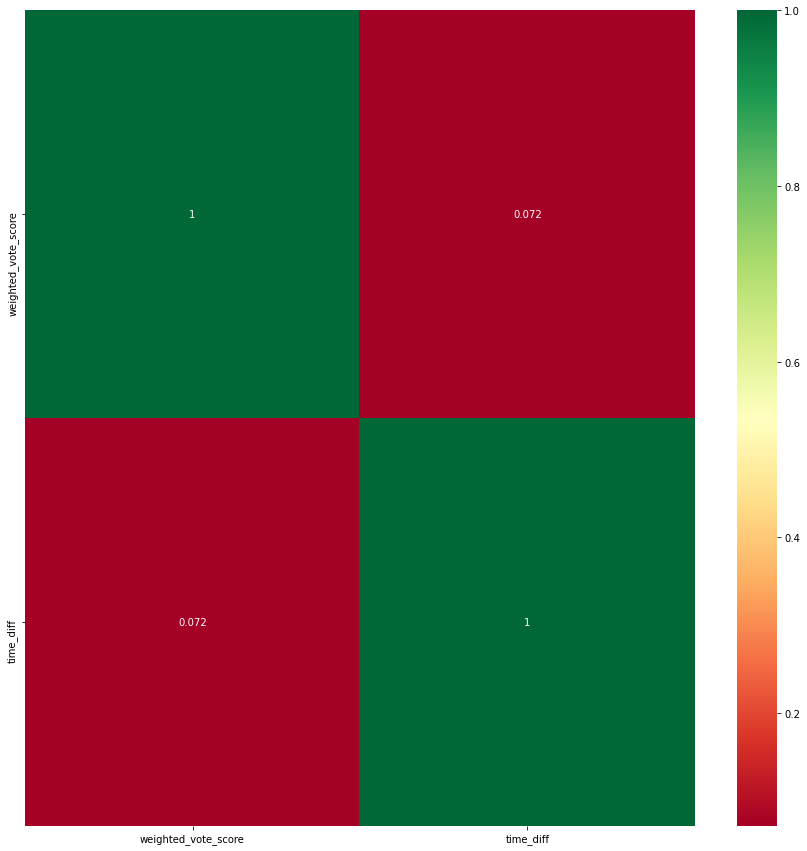

In [9]:
plt.subplots(figsize=(15, 15))
sns.heatmap(df_time.corr(), annot=True,cmap ='RdYlGn') 

In [10]:
weight_mean = df_time["weighted_vote_score"].mean()
time_mean = df_time["time_diff"].mean()
print("Mean:",weight_mean,time_mean)
weight_std = df_time["weighted_vote_score"].std()
time_std = df_time["time_diff"].std()
print("Std:",weight_std,time_std)

Mean: 0.1516370249795965 4253055.798352
Std: 0.23709550279637442 19989983.80644464


In [11]:
#Time diff affect to weighted vote score
#Time diff doesnt affect to weighted vote score
ztest, pval = stests.ztest(df_time["weighted_vote_score"], df_time["weighted_vote_score"], value=(time_mean-weight_mean), alternative='two-sided')
print("p-value",pval)
if pval <0.05:
    print("we reject null hypothesis")
else: 
    print("we accept null hypothesis")

p-value 0.0
we reject null hypothesis


## also we see in corr graph weak relation its mean that time diff doesnt affect to weighted vote score

# RQ8.3

Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

# What insights can you extract from a Box Plot
# (I just copy in wikipedia boxplot definiton)

#In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution (though Tukey's boxplot assumes symmetry for the whiskers and normality for their length). The spacings between the different parts of the box indicate the degree of dispersion (spread) and skewness in the data, and show outliers. In addition to the points themselves, they allow one to visually estimate various L-estimators, notably the interquartile range, midhinge, range, mid-range, and trimean. Box plots can be drawn either horizontally or vertically. Box plots received their name from the box in the middle, and from the plot that they are.

# What are histograms, bar plots, scatterplots and pie charts used for?
https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
https://www.investopedia.com/terms/h/histogram.asp#:~:text=A%20histogram%20is%20a%20graphical,into%20logical%20ranges%20or%20bins.
https://en.wikipedia.org/wiki/Scatter_plot  
 https://en.wikipedia.org/wiki/Pie_chart
# We should just paraphrase

# TQ3

In the knapsack problem we are given n objects and each object i has a weight w_i and a value v_i. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values. The following are three natural heuristics:

Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded

Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded

Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded

For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.

In [ ]:
???
n=int(input())
budget=int(input())
w_i=[]
v_i_n = []
v_i=[]
for i in range(n):
    w_i.append(int(input()))
    v_i.append(int(input()))
sorted(w_i)
print(w_i,v_i)